In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("water_potability.csv")
print(data.shape)

(3276, 10)


In [3]:
data.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
#data cleaning
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
data = data.fillna(data.mean(),)

In [7]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [8]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


#to check dim reduction we can check by using heatmap


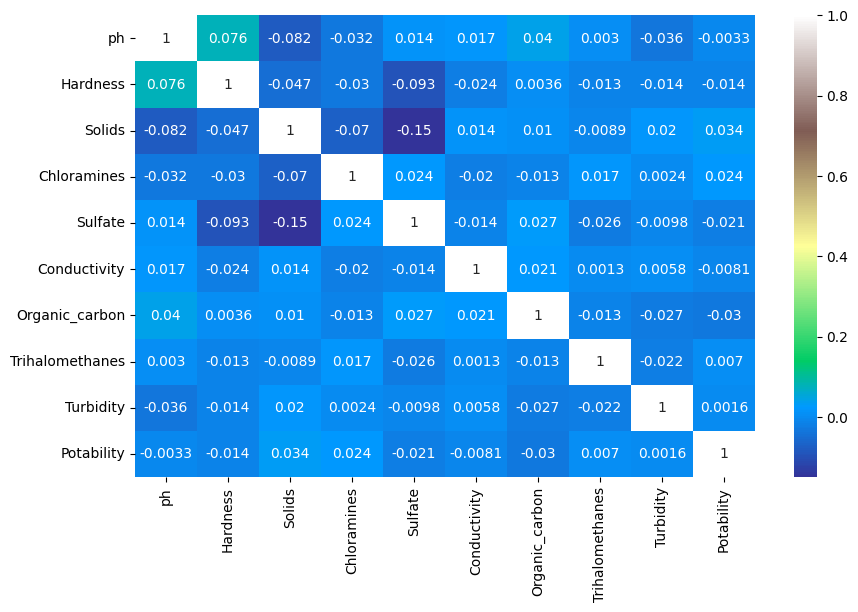

In [9]:
sns.heatmap(data.corr(),annot=True,cmap='terrain')
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()

#check the outliers which mean values to far from mean by using boxplot


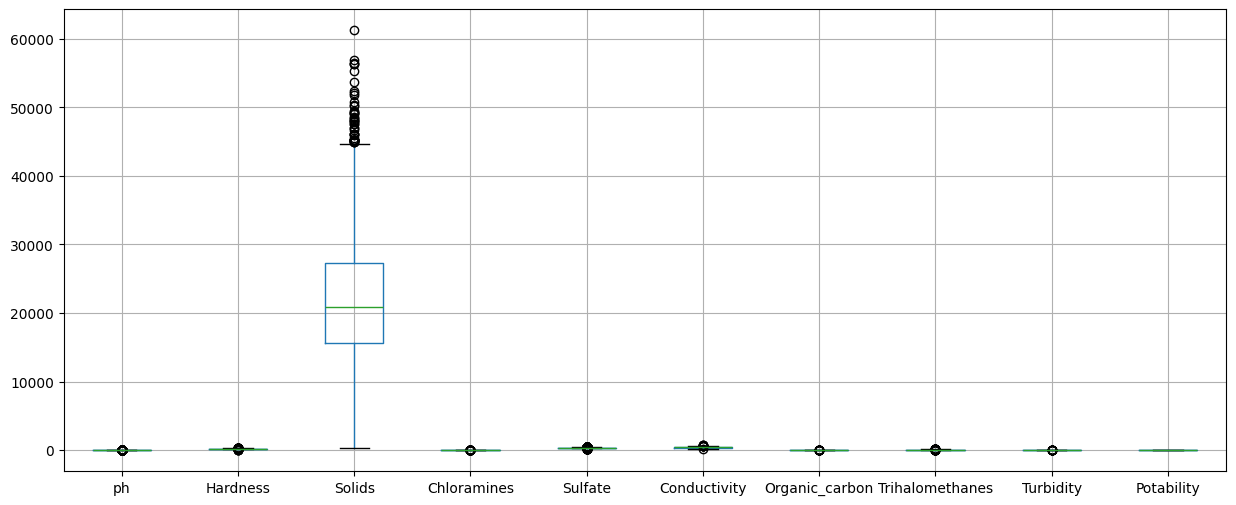

In [10]:
data.boxplot(figsize=(15,6))
plt.show()

In [11]:
data['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

#check by removing and not removing here not removing they are important
#label encoding converting from string to numeric forx if there is bad instead of 0 and good of 1


In [12]:
data['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

<Axes: ylabel='count'>

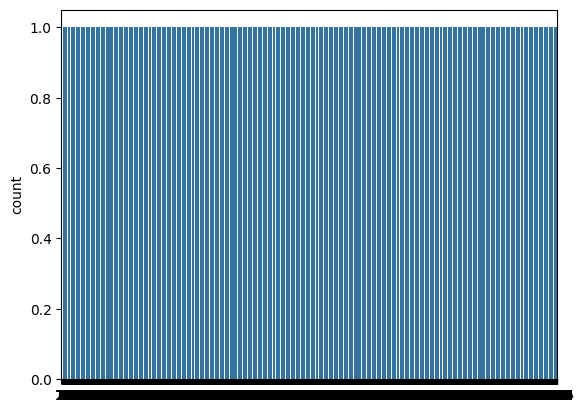

In [13]:
sns.countplot(data['Potability'])

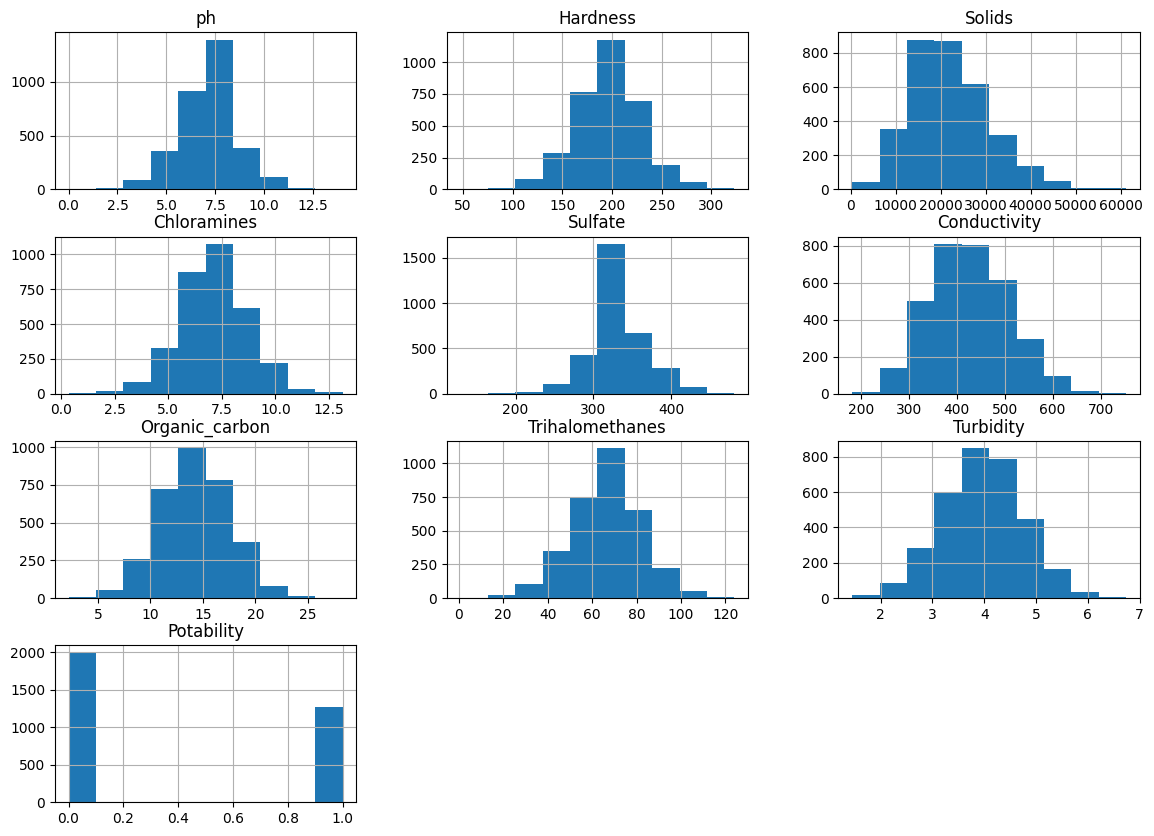

In [14]:
#checking normal distribution
data.hist(figsize=(14,10))
plt.show()

<Axes: xlabel='ph', ylabel='Potability'>

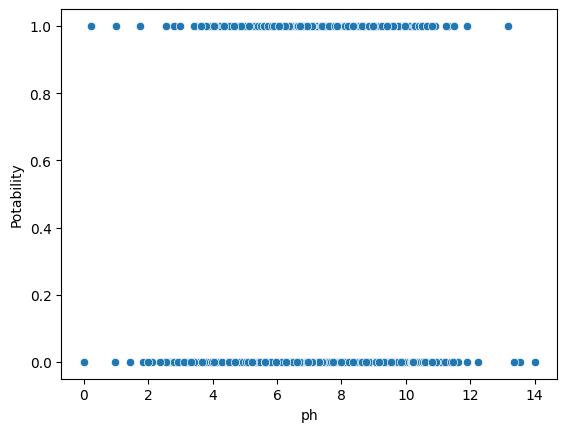

In [15]:
sns.scatterplot(x=data['ph'],y=data['Potability'])

In [16]:
#normalization


In [23]:
#partitoning(dividing the csv into train data and test data)
x = data.drop('Potability',axis=1)
y = data['Potability']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=0)

2017    1
2533    0
589     0
482     0
2620    0
       ..
2802    1
1120    1
601     0
2381    1
98      0
Name: Potability, Length: 656, dtype: int64

In [36]:
#model training(tip:try all ml algos and check )
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()


In [37]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
x_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2017,8.111953,217.266472,38184.469574,7.254122,311.910224,281.069203,13.027921,78.582094,4.430750
2533,6.768060,179.805992,23793.031358,5.332099,333.198191,461.530446,13.557381,60.571241,4.145807
589,7.080795,180.893036,17705.608616,6.223312,350.195253,447.937123,10.461025,32.074863,3.999125
482,7.705711,178.922858,18476.619166,8.226228,334.889911,518.043369,10.638798,63.157489,3.861956
2620,5.830542,165.467025,30021.257079,8.433097,334.397777,494.154505,16.666613,69.580253,5.192117
...,...,...,...,...,...,...,...,...,...
2802,5.230454,152.094169,24790.724599,6.308730,388.998079,307.918075,12.594197,51.625213,3.695615
1120,7.444914,203.068746,25489.075026,8.175744,413.560378,405.420612,13.283100,74.412867,2.571392
601,7.080795,220.552524,28135.076838,7.978098,307.652451,421.464253,17.532298,86.848098,3.569570
2381,4.945695,170.440921,23000.723137,4.433725,340.645670,346.642267,13.276638,84.551081,3.782517


In [39]:
y_test

2017    1
2533    0
589     0
482     0
2620    0
       ..
2802    1
1120    1
601     0
2381    1
98      0
Name: Potability, Length: 656, dtype: int64

In [41]:
y_prediction= dt.predict(x_test)


In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix


In [43]:
accuracy_score(y_prediction,y_test)

0.5929878048780488

In [44]:
confusion_matrix(y_prediction,y_test)

array([[279, 134],
       [133, 110]], dtype=int64)

In [46]:
#try more ml models

(656,)

In [49]:
#model optimization (hyper parameter tuning)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


In [50]:
dt = DecisionTreeClassifier()
criterian= ["gini","entropy"]
splitter = ['best','random']
min_samples_split = range(1,10)

parameters = dict(criterian=criterian,splitter=splitter,min_samples_split= min_samples_split)
cv = RepeatedStratifiedKFold(n_splits=5,random_state=101)

grid_search_cv_dt = GridSearchCV(estimator = dt,param_grid=parameters,scoring='accuracy',cv=cv)

In [ ]:
grid_search_cv_dt.fit(x_train,y_train)
#print(grid_search)